In [1]:
import numpy as np
import pandas as pd

import matplotlib.ticker as ticker
from matplotlib import cm

import matplotlib.pyplot as plt

In [2]:
df0 = pd.read_csv('csv/high-default-new.csv')
df1 = pd.read_csv('csv/high-adaps-mua04betaa10b025taua600.csv')

In [3]:
xaxis = 'I_e'
yaxis = 'I_i'
scatters = np.array([[0.1, -0.55], [0.2, -0.25], [0.39, -0.04]])#[0.1, -0.4], [0.85, 0.27]])
colorbar = True
lw = 3 #linewidth

In [4]:
def setAxes(df, nmb):
    
    # Add minorticks on the colorbar to make it easy to read the
    # values off the colorbar.
    
    nmb_labels = 5
                
    idx_x = np.linspace(0,len(df.columns.values)-1, nmb_labels).astype(int)
    idx_y = np.linspace(0,len(df.index.values)-1, nmb_labels).astype(int)
        
    xliste= np.round(df.columns.values, decimals=2)[idx_x]
    yliste= np.round(df.index.values, decimals=2)[idx_y]
    
    xlabels=list('%.1f'%(e) for e in xliste)
    ylabels=list('%.1f'%(e) for e in yliste)
    
    return xlabels, ylabels

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_6364/2331698461.py:27: UserWarning: The following kwargs were not used by contour: 'linewidth'
  c1 = ax0.contour(stabis0, origin='lower', vmin=0, vmax=2, levels=1,
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_6364/2331698461.py:29: UserWarning: No contour levels were found within the data range.
  c2 = ax0.contour(turings0, origin='lower', vmin=0, vmax=1, levels=0,
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_6364/2331698461.py:29: UserWarning: The following kwargs were not used by contour: 'linewidth'
  c2 = ax0.contour(turings0, origin='lower', vmin=0, vmax=1, levels=0,
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_6364/2331698461.py:49: UserWarning: The following kwargs were not used by contour: 'linewidth'
  c1 = ax1.contour(stabis1, origin='lower', vmin=0, vmax=2, levels=1,
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_6364/2331698461.py:51: UserWarning: No contour lev

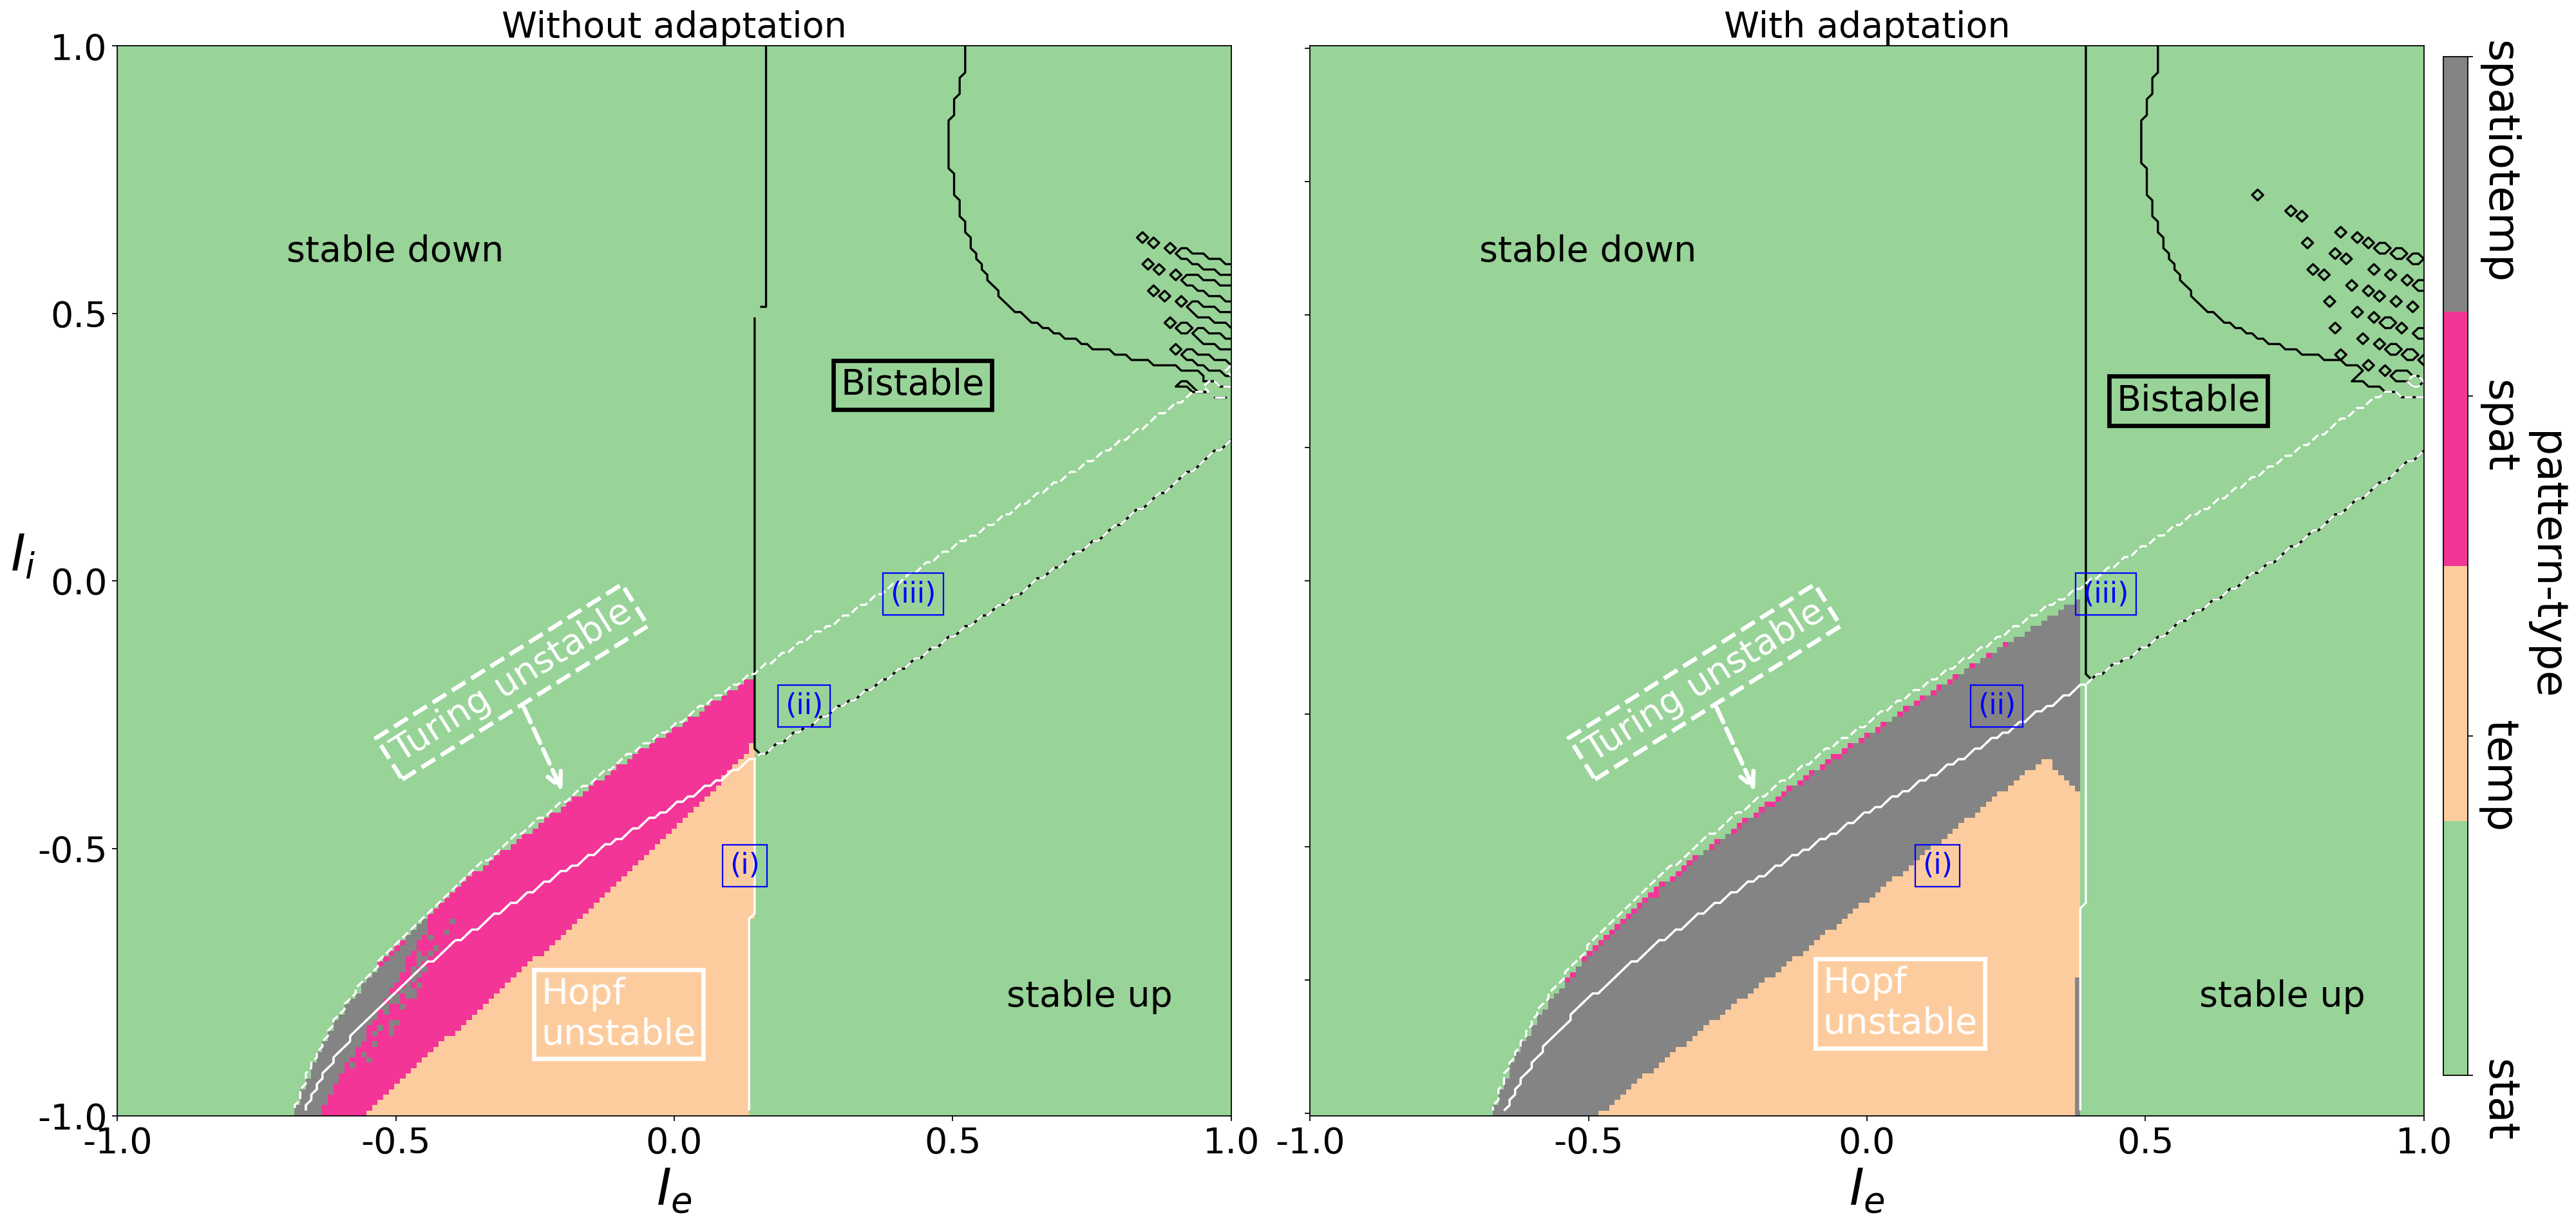

In [5]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize = (24,12), dpi = 160)

ax0.set_title('Without adaptation', fontsize=25)
ax1.set_title('With adaptation', fontsize=25)

p_colors = cm.get_cmap('Accent', 4)
    
stabis0 = df0.pivot_table('stability', columns=xaxis, index=yaxis)
turings0 = df0.pivot_table('turing', columns=xaxis, index=yaxis)
p_randoms0 = df0.pivot_table('p_random', columns=xaxis, index=yaxis)


stabis1 = df1.pivot_table('stability', columns=xaxis, index=yaxis)
turings1 = df1.pivot_table('static', columns=xaxis, index=yaxis)
p_randoms1 = df1.pivot_table('p_random', columns=xaxis, index=yaxis)

unstable_color = 'white'
stable_color='black'


nmb_labels = 5
            
xlabels, ylabels = setAxes(stabis0, nmb_labels)

pos = ax0.imshow(p_randoms0, origin='lower', vmin=1, vmax=4, aspect='auto', 
                 cmap=p_colors, alpha=0.8) #
c1 = ax0.contour(stabis0, origin='lower', vmin=0, vmax=2, levels=1, 
                 colors=[unstable_color, stable_color, 'green'], linewidth = lw)
c2 = ax0.contour(turings0, origin='lower', vmin=0, vmax=1, levels=0, 
                 colors=[unstable_color], linestyles='dashed', linewidth = lw)

ax0.text(130, 135, 'Bistable', fontsize=25, bbox=dict(facecolor='none', alpha=1, 
                                      edgecolor=stable_color, pad=5, linewidth=lw))

ax0.text(76, 13, 'Hopf' + '\n' +'unstable', color=unstable_color,  fontsize=25, bbox=dict(facecolor='none', alpha=1, 
                                      edgecolor=unstable_color, pad=5, linewidth=lw))

ax0.annotate('Turing unstable', color=unstable_color, rotation=32, fontsize=25, bbox=dict(facecolor='none', alpha=1, 
                                      edgecolor=unstable_color, pad=5, linewidth=lw, linestyle='dashed'),
            xy = (80, 60), xytext=(48, 66), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=unstable_color, linewidth=lw, linestyle='dashed'))


ax0.text(30, 160, 'stable down', fontsize=25)
ax0.text(160, 20, 'stable up', fontsize=25)

pos = ax1.imshow(p_randoms1, origin='lower', vmin=1, vmax=4, aspect='auto', 
                 cmap=p_colors, alpha=0.8) #
c1 = ax1.contour(stabis1, origin='lower', vmin=0, vmax=2, levels=1, 
                 colors=[unstable_color, stable_color, 'green'], linewidth = lw)
c2 = ax1.contour(turings1, origin='lower', vmin=0, vmax=1, levels=0, 
                 colors=[unstable_color], linestyles='dashed', linewidth = lw)

ax1.text(145, 132, 'Bistable', fontsize=25, bbox=dict(facecolor='none', alpha=1, 
                                      edgecolor=stable_color, pad=5, linewidth=lw))

ax1.text(92, 15, 'Hopf' + '\n' +'unstable', color=unstable_color,  fontsize=25, bbox=dict(facecolor='none', alpha=1, 
                                      edgecolor=unstable_color, pad=5, linewidth=lw))

ax1.annotate('Turing unstable', color=unstable_color, rotation=32, fontsize=25, bbox=dict(facecolor='none', alpha=1, 
                                      edgecolor=unstable_color, pad=5, linewidth=lw, linestyle='dashed'),
            xy = (80, 60), xytext=(48, 66), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=unstable_color, linewidth=lw, linestyle='dashed'))


ax1.text(30, 160, 'stable down', fontsize=25)
ax1.text(160, 20, 'stable up', fontsize=25)


markers = ['(i)', '(ii)', '(iii)', '(iv)']
count=0
for scatter in scatters:
    #left plot
    scatter0 = stabis0.columns.values.flat[np.abs(stabis0.columns.values - scatter[0]).argmin()]#findNearest(stabis.index.values, scatter[0])
    scatter1 = stabis0.index.values.flat[np.abs(stabis0.index.values - scatter[1]).argmin()] #findNearest(stabis.index.values, scatter[1])
    xnodes = np.linspace(0, len(stabis0.columns.values)-1, len(stabis0.columns.values))
    ynodes = np.linspace(0, len(stabis0.index.values)-1, len(stabis0.index.values))
  #  ax0.scatter(xnodes[list(stabis0.columns.values).index(scatter0)], 
  #             ynodes[list(stabis0.index.values).index(scatter1)], 
  #             s=250, c='blue', marker=markers[count], zorder=2) 
    ax0.text(xnodes[list(stabis0.columns.values).index(scatter0)], 
             ynodes[list(stabis0.index.values).index(scatter1)], 
             markers[count], color='blue', fontsize=20, #marker=markers[count], 
            bbox=dict(facecolor='none', alpha=1, edgecolor='blue', pad=5, linewidth=1))
    
    
    #right plot
    scatter2 = stabis1.columns.values.flat[np.abs(stabis1.columns.values - scatter[0]).argmin()]#findNearest(stabis.index.values, scatter[0])
    scatter3 = stabis1.index.values.flat[np.abs(stabis1.index.values - scatter[1]).argmin()] #findNearest(stabis.index.values, scatter[1])
    xnodes = np.linspace(0, len(stabis1.columns.values)-1, len(stabis1.columns.values))
    ynodes = np.linspace(0, len(stabis1.index.values)-1, len(stabis1.index.values))
   # ax1.scatter(xnodes[list(stabis1.columns.values).index(scatter2)], 
   #            ynodes[list(stabis1.index.values).index(scatter3)], 
   #            s=250, c='blue', marker=markers[count], zorder=2) 
    ax1.text(xnodes[list(stabis0.columns.values).index(scatter2)], 
             ynodes[list(stabis0.index.values).index(scatter3)], 
             markers[count], color='blue', fontsize=20, #marker=markers[count], 
            bbox=dict(facecolor='none', alpha=1, edgecolor='blue', pad=5, linewidth=1))
    count+=1
    
    
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.

ax0.xaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
ax0.set_xticklabels(labels=xlabels, fontsize=25)
ax0.yaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
ax0.set_yticklabels(labels=ylabels, fontsize=25)

ax1.xaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
ax1.set_xticklabels(labels=xlabels, fontsize=25)

ax0.set_xlabel(r'$%s$' %xaxis, fontsize=35)
ax0.set_ylabel(r'$%s$' %yaxis, labelpad=10, rotation=0, fontsize=35)
ax1.set_xlabel(r'$%s$' %xaxis, fontsize=35)

ax1.label_outer()

mini = 1
maxi = 4
cbar_ticks=np.linspace(mini,maxi,4)
cbar_ticks=np.around(cbar_ticks, decimals=0)
cbar_labels=['stat', 'temp', 'spat', 'spatiotemp']


plt.tight_layout()

if colorbar:
    # Create colorbar
    cb_ax = fig.add_axes([.99,.126,.01,.824])#([.99,.120,.04,.754])
    cbar = ax1.figure.colorbar(pos, ax=ax1, ticks=cbar_ticks, cax=cb_ax)
    cbar.ax.set_ylabel('pattern-type', rotation=-90, va="bottom", fontsize=30)
    cbar.ax.set_yticklabels(cbar_labels, rotation=-90, fontsize=30)
    cbar.minorticks_off()

plt.savefig('state-spaces.png')

In [19]:
scatters = np.array([]) #np.array([[0.47, 0.01], [0.4, -0.14], [0.2, -0.25], [0.1, -0.55]])#[0.1, -0.4], [0.85, 0.27]])
lw=4

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_6364/4109185669.py:33: UserWarning: No contour levels were found within the data range.
  c2 = ax0.contour(turings0, origin='lower', vmin=0, vmax=1, levels=0,
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_6364/4109185669.py:35: UserWarning: No contour levels were found within the data range.
  c3 = ax0.contour(compare0, origin='lower', vmin=0, vmax=1, levels=0, colors=[stable_color],
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_6364/4109185669.py:63: UserWarning: No contour levels were found within the data range.
  c2 = ax1.contour(turings1, origin='lower', vmin=0, vmax=1, levels=0,
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_6364/4109185669.py:65: UserWarning: No contour levels were found within the data range.
  c3 = ax1.contour(compare1, origin='lower', vmin=0, vmax=1, levels=0, colors=[stable_color],
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_6364/4109185669.py:130:

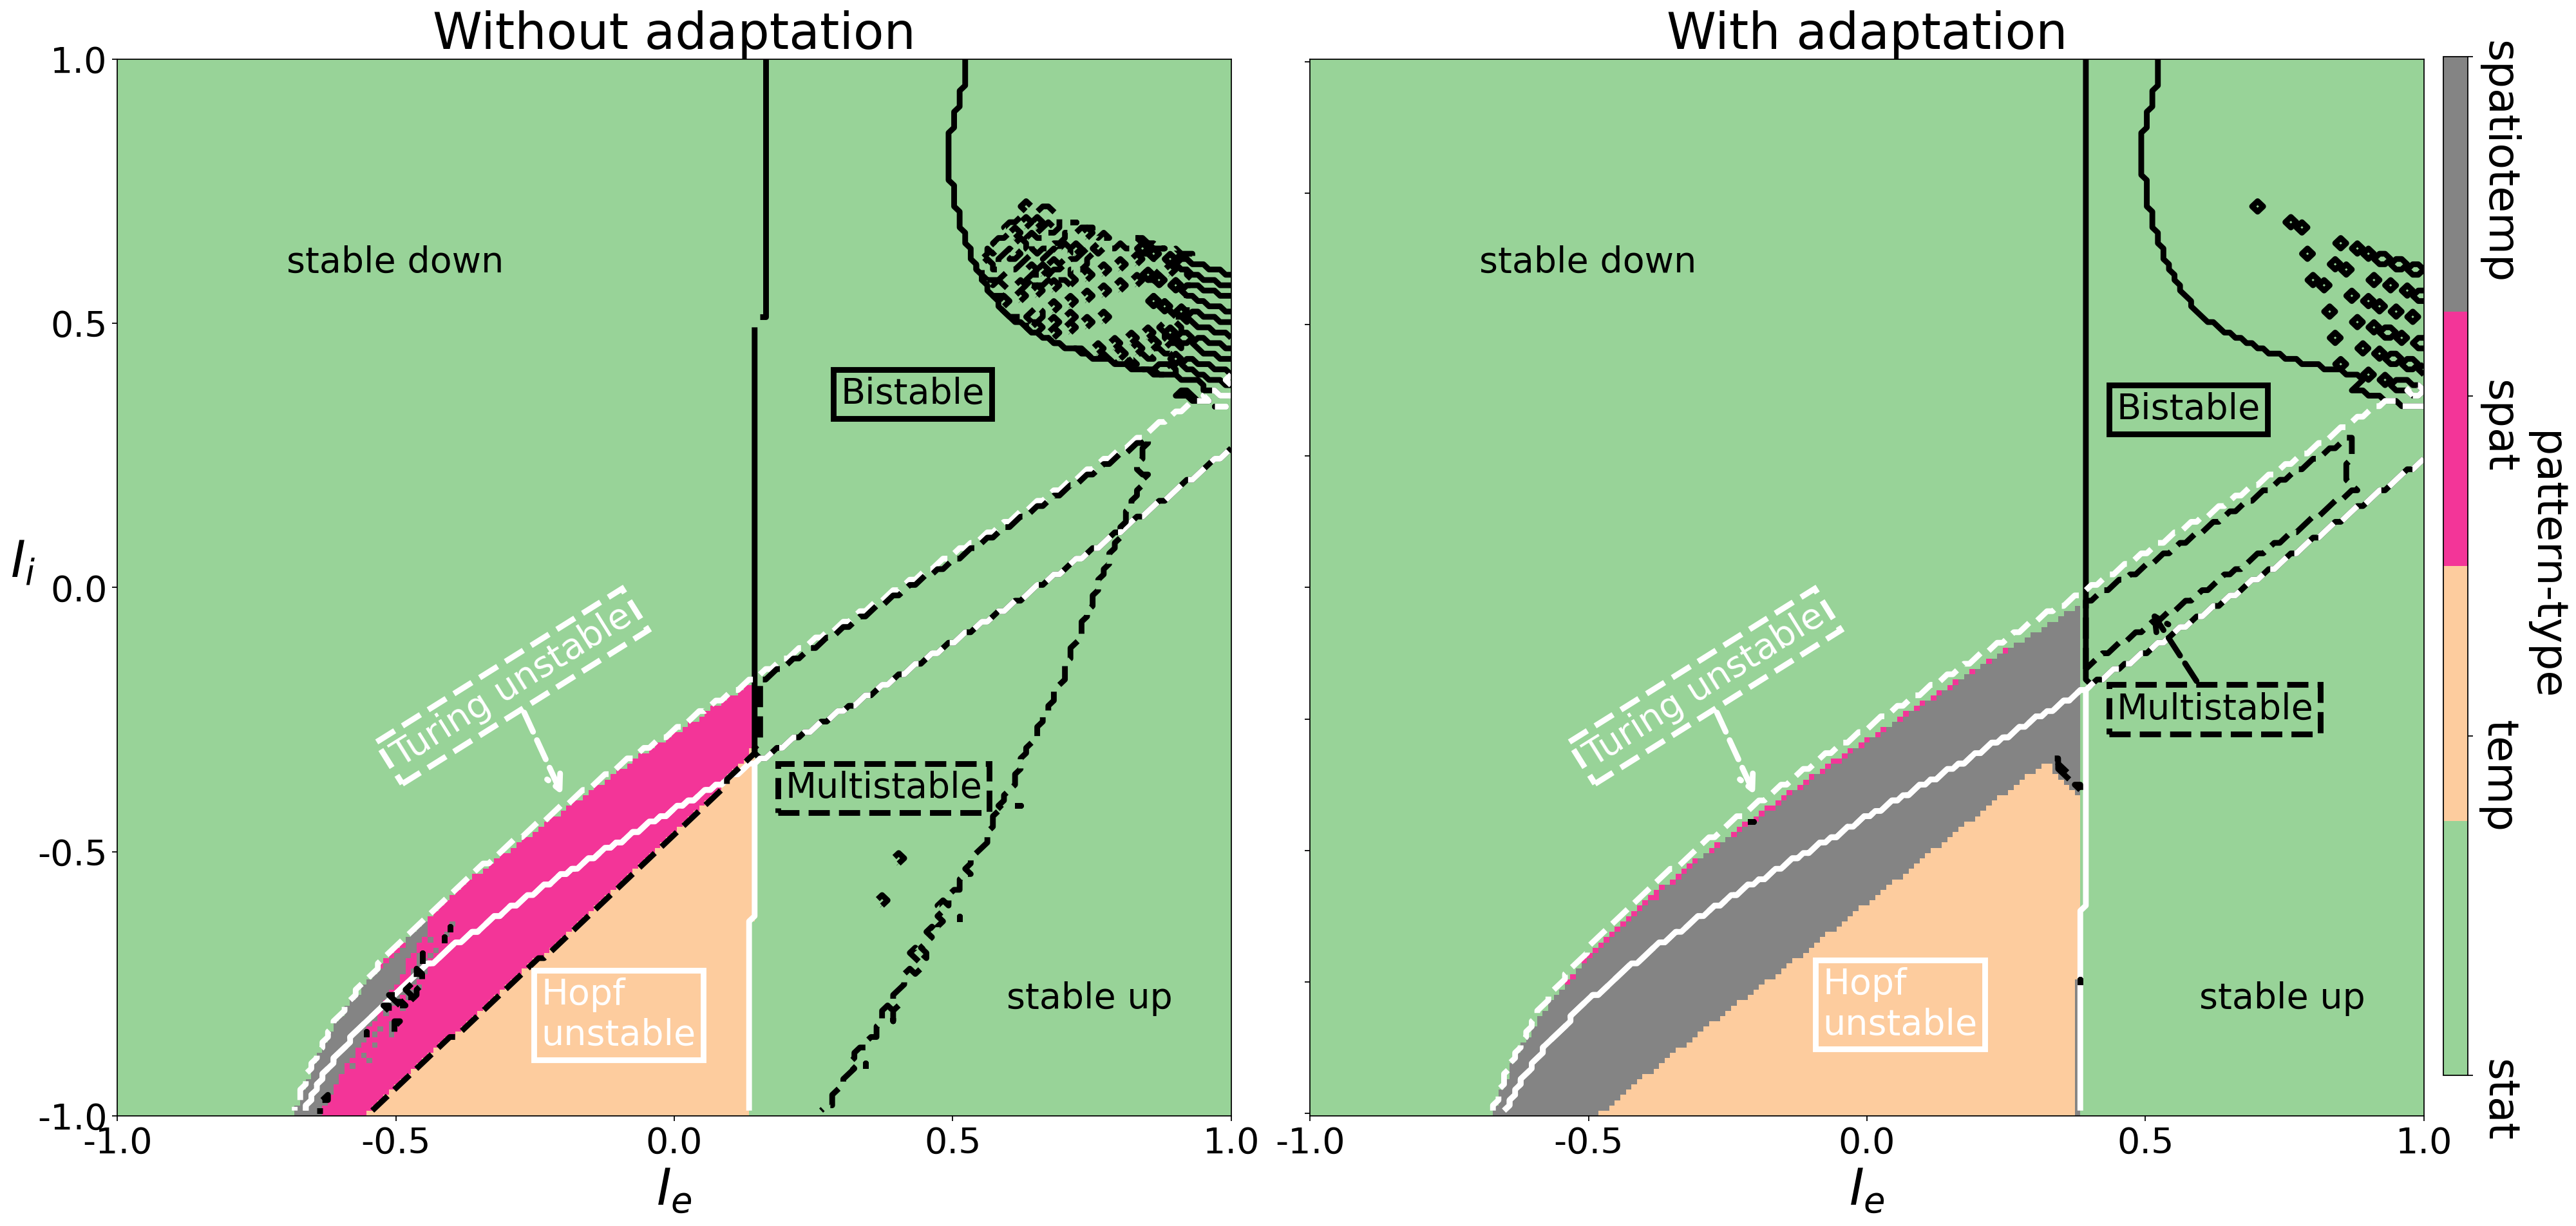

In [20]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize = (24,12), dpi = 160)

ax0.set_title('Without adaptation', fontsize=35)
ax1.set_title('With adaptation', fontsize=35)

p_colors = cm.get_cmap('Accent', 4)
    
stabis0 = df0.pivot_table('stability', columns=xaxis, index=yaxis)
turings0 = df0.pivot_table('turing', columns=xaxis, index=yaxis)
p_randoms0 = df0.pivot_table('p_random', columns=xaxis, index=yaxis)
p_downs0 = df0.pivot_table('p_down', columns=xaxis, index=yaxis) #kommentiere diese zeile aus, falls multistabi nicht erhoben wird
compare0 = p_randoms0.eq(p_downs0)


stabis1 = df1.pivot_table('stability', columns=xaxis, index=yaxis)
turings1 = df1.pivot_table('static', columns=xaxis, index=yaxis)
p_randoms1 = df1.pivot_table('p_random', columns=xaxis, index=yaxis)
p_downs1 = df1.pivot_table('p_down', columns=xaxis, index=yaxis) #kommentiere diese zeile aus, falls multistabi nicht erhoben wird
compare1 = p_randoms1.eq(p_downs1)

unstable_color = 'white'
stable_color='black'


nmb_labels = 5
            
xlabels, ylabels = setAxes(stabis0, nmb_labels)

pos = ax0.imshow(p_randoms0, origin='lower', vmin=1, vmax=4, aspect='auto', 
                 cmap=p_colors, alpha=0.8) #
c1 = ax0.contour(stabis0, origin='lower', vmin=0, vmax=2, levels=1, 
                 colors=[unstable_color, stable_color, 'green'], linewidths = lw)
c2 = ax0.contour(turings0, origin='lower', vmin=0, vmax=1, levels=0, 
                 colors=[unstable_color], linestyles='dashed', linewidths = lw)
c3 = ax0.contour(compare0, origin='lower', vmin=0, vmax=1, levels=0, colors=[stable_color], 
                 linewidths=lw, linestyles='dashed')

ax0.text(130, 135, 'Bistable', fontsize=25, bbox=dict(facecolor='none', alpha=1, 
                                      edgecolor=stable_color, pad=5, linewidth=lw))

ax0.text(76, 13, 'Hopf' + '\n' +'unstable', color=unstable_color,  fontsize=25, bbox=dict(facecolor='none', alpha=1, 
                                      edgecolor=unstable_color, pad=5, linewidth=lw))

ax0.annotate('Turing unstable', color=unstable_color, rotation=32, fontsize=25,
             bbox=dict(facecolor='none', alpha=1, edgecolor=unstable_color, 
                       pad=5, linewidth=lw, linestyle='dashed'),
            xy = (80, 60), xytext=(48, 66), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=unstable_color, 
                            linewidth=lw, linestyle='dashed'))

ax0.text(120, 60, 'Multistable', fontsize=25, 
            bbox=dict(facecolor='none', alpha=1, edgecolor=stable_color, 
                      pad=5, linewidth=lw, linestyle='dashed'))


ax0.text(30, 160, 'stable down', fontsize=25)
ax0.text(160, 20, 'stable up', fontsize=25)

pos = ax1.imshow(p_randoms1, origin='lower', vmin=1, vmax=4, aspect='auto', 
                 cmap=p_colors, alpha=0.8) #
c1 = ax1.contour(stabis1, origin='lower', vmin=0, vmax=2, levels=1, 
                 colors=[unstable_color, stable_color, 'green'], linewidths = lw)
c2 = ax1.contour(turings1, origin='lower', vmin=0, vmax=1, levels=0, 
                 colors=[unstable_color], linestyles='dashed', linewidths = lw)
c3 = ax1.contour(compare1, origin='lower', vmin=0, vmax=1, levels=0, colors=[stable_color], 
                 linewidths=lw, linestyles='dashed')

ax1.text(145, 132, 'Bistable', fontsize=25, bbox=dict(facecolor='none', alpha=1, 
                                      edgecolor=stable_color, pad=5, linewidth=lw))

ax1.text(92, 15, 'Hopf' + '\n' +'unstable', color=unstable_color,  fontsize=25, 
         bbox=dict(facecolor='none', alpha=1, edgecolor=unstable_color, 
                   pad=5, linewidth=lw))

ax1.annotate('Turing unstable', color=unstable_color, rotation=32, fontsize=25, 
             bbox=dict(facecolor='none', alpha=1, edgecolor=unstable_color, 
                       pad=5, linewidth=lw, linestyle='dashed'),
            xy = (80, 60), xytext=(48, 66), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=unstable_color, 
                            linewidth=lw, linestyle='dashed'))

ax1.annotate('Multistable', fontsize=25, 
            bbox=dict(facecolor='none', alpha=1, edgecolor=stable_color, 
                      pad=5, linewidth=lw, linestyle='dashed'), 
            xy = (151, 96), xytext=(145, 75), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=stable_color, 
                            linewidth=lw, linestyle='dashed'))


ax1.text(30, 160, 'stable down', fontsize=25)
ax1.text(160, 20, 'stable up', fontsize=25)


markers = ['(i)', '(ii)', '(iii)', '(iv)']
count=0
for scatter in scatters:
    #left plot
    scatter0 = stabis0.columns.values.flat[np.abs(stabis0.columns.values - scatter[0]).argmin()]#findNearest(stabis.index.values, scatter[0])
    scatter1 = stabis0.index.values.flat[np.abs(stabis0.index.values - scatter[1]).argmin()] #findNearest(stabis.index.values, scatter[1])
    xnodes = np.linspace(0, len(stabis0.columns.values)-1, len(stabis0.columns.values))
    ynodes = np.linspace(0, len(stabis0.index.values)-1, len(stabis0.index.values))
  #  ax0.scatter(xnodes[list(stabis0.columns.values).index(scatter0)], 
  #             ynodes[list(stabis0.index.values).index(scatter1)], 
  #             s=250, c='blue', marker=markers[count], zorder=2) 
    ax0.text(xnodes[list(stabis0.columns.values).index(scatter0)], 
             ynodes[list(stabis0.index.values).index(scatter1)], 
             markers[count], color='blue', fontsize=20, #marker=markers[count], 
            bbox=dict(facecolor='none', alpha=1, edgecolor='blue', pad=5, linewidth=lw/2))
    
    
    #right plot
    scatter2 = stabis1.columns.values.flat[np.abs(stabis1.columns.values - scatter[0]).argmin()]#findNearest(stabis.index.values, scatter[0])
    scatter3 = stabis1.index.values.flat[np.abs(stabis1.index.values - scatter[1]).argmin()] #findNearest(stabis.index.values, scatter[1])
    xnodes = np.linspace(0, len(stabis1.columns.values)-1, len(stabis1.columns.values))
    ynodes = np.linspace(0, len(stabis1.index.values)-1, len(stabis1.index.values))
   # ax1.scatter(xnodes[list(stabis1.columns.values).index(scatter2)], 
   #            ynodes[list(stabis1.index.values).index(scatter3)], 
   #            s=250, c='blue', marker=markers[count], zorder=2) 
    ax1.text(xnodes[list(stabis0.columns.values).index(scatter2)], 
             ynodes[list(stabis0.index.values).index(scatter3)], 
             markers[count], color='blue', fontsize=20, #marker=markers[count], 
            bbox=dict(facecolor='none', alpha=1, edgecolor='blue', pad=5, linewidth=lw/2))
    count+=1
    
    
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.

ax0.xaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
ax0.set_xticklabels(labels=xlabels, fontsize=25)
ax0.yaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
ax0.set_yticklabels(labels=ylabels, fontsize=25)

ax1.xaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
ax1.set_xticklabels(labels=xlabels, fontsize=25)

ax0.set_xlabel(r'$%s$' %xaxis, fontsize=35)
ax0.set_ylabel(r'$%s$' %yaxis, labelpad=10, rotation=0, fontsize=35)
ax1.set_xlabel(r'$%s$' %xaxis, fontsize=35)

ax1.label_outer()

mini = 1
maxi = 4
cbar_ticks=np.linspace(mini,maxi,4)
cbar_ticks=np.around(cbar_ticks, decimals=0)
cbar_labels=['stat', 'temp', 'spat', 'spatiotemp']


plt.tight_layout()

if colorbar:
    # Create colorbar
    cb_ax = fig.add_axes([.99,.126,.01,.824])#([.99,.120,.04,.754])
    cbar = ax1.figure.colorbar(pos, ax=ax1, ticks=cbar_ticks, cax=cb_ax)
    cbar.ax.set_ylabel('pattern-type', rotation=-90, va="bottom", fontsize=30)
    cbar.ax.set_yticklabels(cbar_labels, rotation=-90, fontsize=30)
    cbar.minorticks_off()

plt.savefig('state-spaces.png')

In [62]:
import py.continuum1d as continuum1d

from py.params import setParams
from py.analysis import computeFPs, checkFixPtsStability, violationType, a_jkValues, lmbd
from py.turings import checkStability

In [63]:
c1d = continuum1d.continuum1d()

1d Model initialised.


In [75]:
ee = scatters[0,0]
ii = scatters[0,1]

params={'I_e': ee, 'I_i': ii, 'b': 0.4, 'end_t': 6*1000, 'mu_a': 0.4, 'beta_a': 10, 'tau_a': 600}

ps = setParams(params)
fps = computeFPs(ps)
stab = checkFixPtsStability(fps, ps)

k=np.linspace(-3,3,51)
a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[-1], ps)

print('fixed points %s ' %str(fps))
print('with (mass) stability %s'  %str(stab))

fp = fps[0]

fixed points [[0.11919653 0.47257095]] 
with (mass) stability [1]


In [57]:
case_i, inh = c1d.run(ps, itype='inte_fft', fp=fp)

In [58]:
case_i_adaps, inh = c1d.run(ps, itype='inte_adaptation', fp=fp)

In [76]:
ps['b'] = 0.4
ps['end_t'] = 12*1000
case_i_larger_b, inh = c1d.run(ps, itype='inte_adaptation', fp=fp)

In [81]:
ee = scatters[1,0]
ii = scatters[1,1]

params={'I_e': ee, 'I_i': ii, 'b': 0.25, 'end_t': 6*1000, 'mu_a': 0.4, 'beta_a': 10, 'tau_a': 6000}

ps = setParams(params)
fps = computeFPs(ps)
stab = checkFixPtsStability(fps, ps)

k=np.linspace(-3,3,51)
a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[-1], ps)

print('fixed points %s ' %str(fps))
print('with (mass) stability %s'  %str(stab))

fp = fps[0]

fixed points [[0.16502514 0.47329606]
 [0.95199638 0.99997269]] 
with (mass) stability [1, 1]


In [52]:
case_ii, inh = c1d.run(ps, itype='inte_fft', fp=fp)

In [54]:
case_ii_adaps, inh = c1d.run(ps, itype='inte_adaptation', fp=fp)

In [82]:
ps['tau_a'] = 6000
ps['end_t'] = 12*1000
case_ii_larger_tau, inh = c1d.run(ps, itype='inte_adaptation', fp=fp)

In [39]:
ee = scatters[2,0]
ii = scatters[2,1]
print('ee=%.2f, ii=%.2f' %(ee,ii))

params={'I_e': ee, 'I_i': ii, 'b': 0.25, 'end_t': 6*1000, 'mu_a': 0.4, 'beta_a': 10}

ps = setParams(params)
fps = computeFPs(ps)
stab = checkFixPtsStability(fps, ps)

k=np.linspace(-3,3,51)
a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[-1], ps)

print('fixed points %s ' %str(fps))
print('with (mass) stability %s'  %str(stab))

fp = fps[0]

ee=0.20, ii=-0.25
fixed points [[0.15540099 0.39073874]] 
with (mass) stability [1]


In [40]:
case_iii, inh = c1d.run(ps, itype='inte_fft', fp=fp)

In [41]:
case_iii_adaps, inh = c1d.run(ps, itype='inte_adaptation', fp=fp)

In [42]:
ee = scatters[3,0]
ii = scatters[3,1]
print('ee=%.2f, ii=%.2f' %(ee,ii))

params={'I_e': ee, 'I_i': ii, 'b': 0.25, 'end_t': 6*1000, 'mu_a': 0.4, 'beta_a': 10}

ps = setParams(params)
fps = computeFPs(ps)
stab = checkFixPtsStability(fps, ps)

k=np.linspace(-3,3,51)
a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[-1], ps)

print('fixed points %s ' %str(fps))
print('with (mass) stability %s'  %str(stab))

fp = fps[0]

ee=0.10, ii=-0.55
fixed points [[0.26247255 0.42157741]] 
with (mass) stability [0]


In [43]:
case_iv, inh = c1d.run(ps, itype='inte_fft', fp=fp)

In [44]:
case_iv_adaps, inh = c1d.run(ps, itype='inte_adaptation', fp=fp)

In [45]:
time_osc = [0,0.5,1]
time_bumps = [0, 1, 2, 3]
space = np. linspace(-25, 25, 5)
space

array([-25. , -12.5,   0. ,  12.5,  25. ])

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1653/2209048415.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=time_bumps, fontsize=25)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1653/2209048415.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=time_osc, fontsize=25)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1653/2209048415.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(labels=space, fontsize=25)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1653/2209048415.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(labels=space, fontsize=25)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1653/2209048415.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_yti

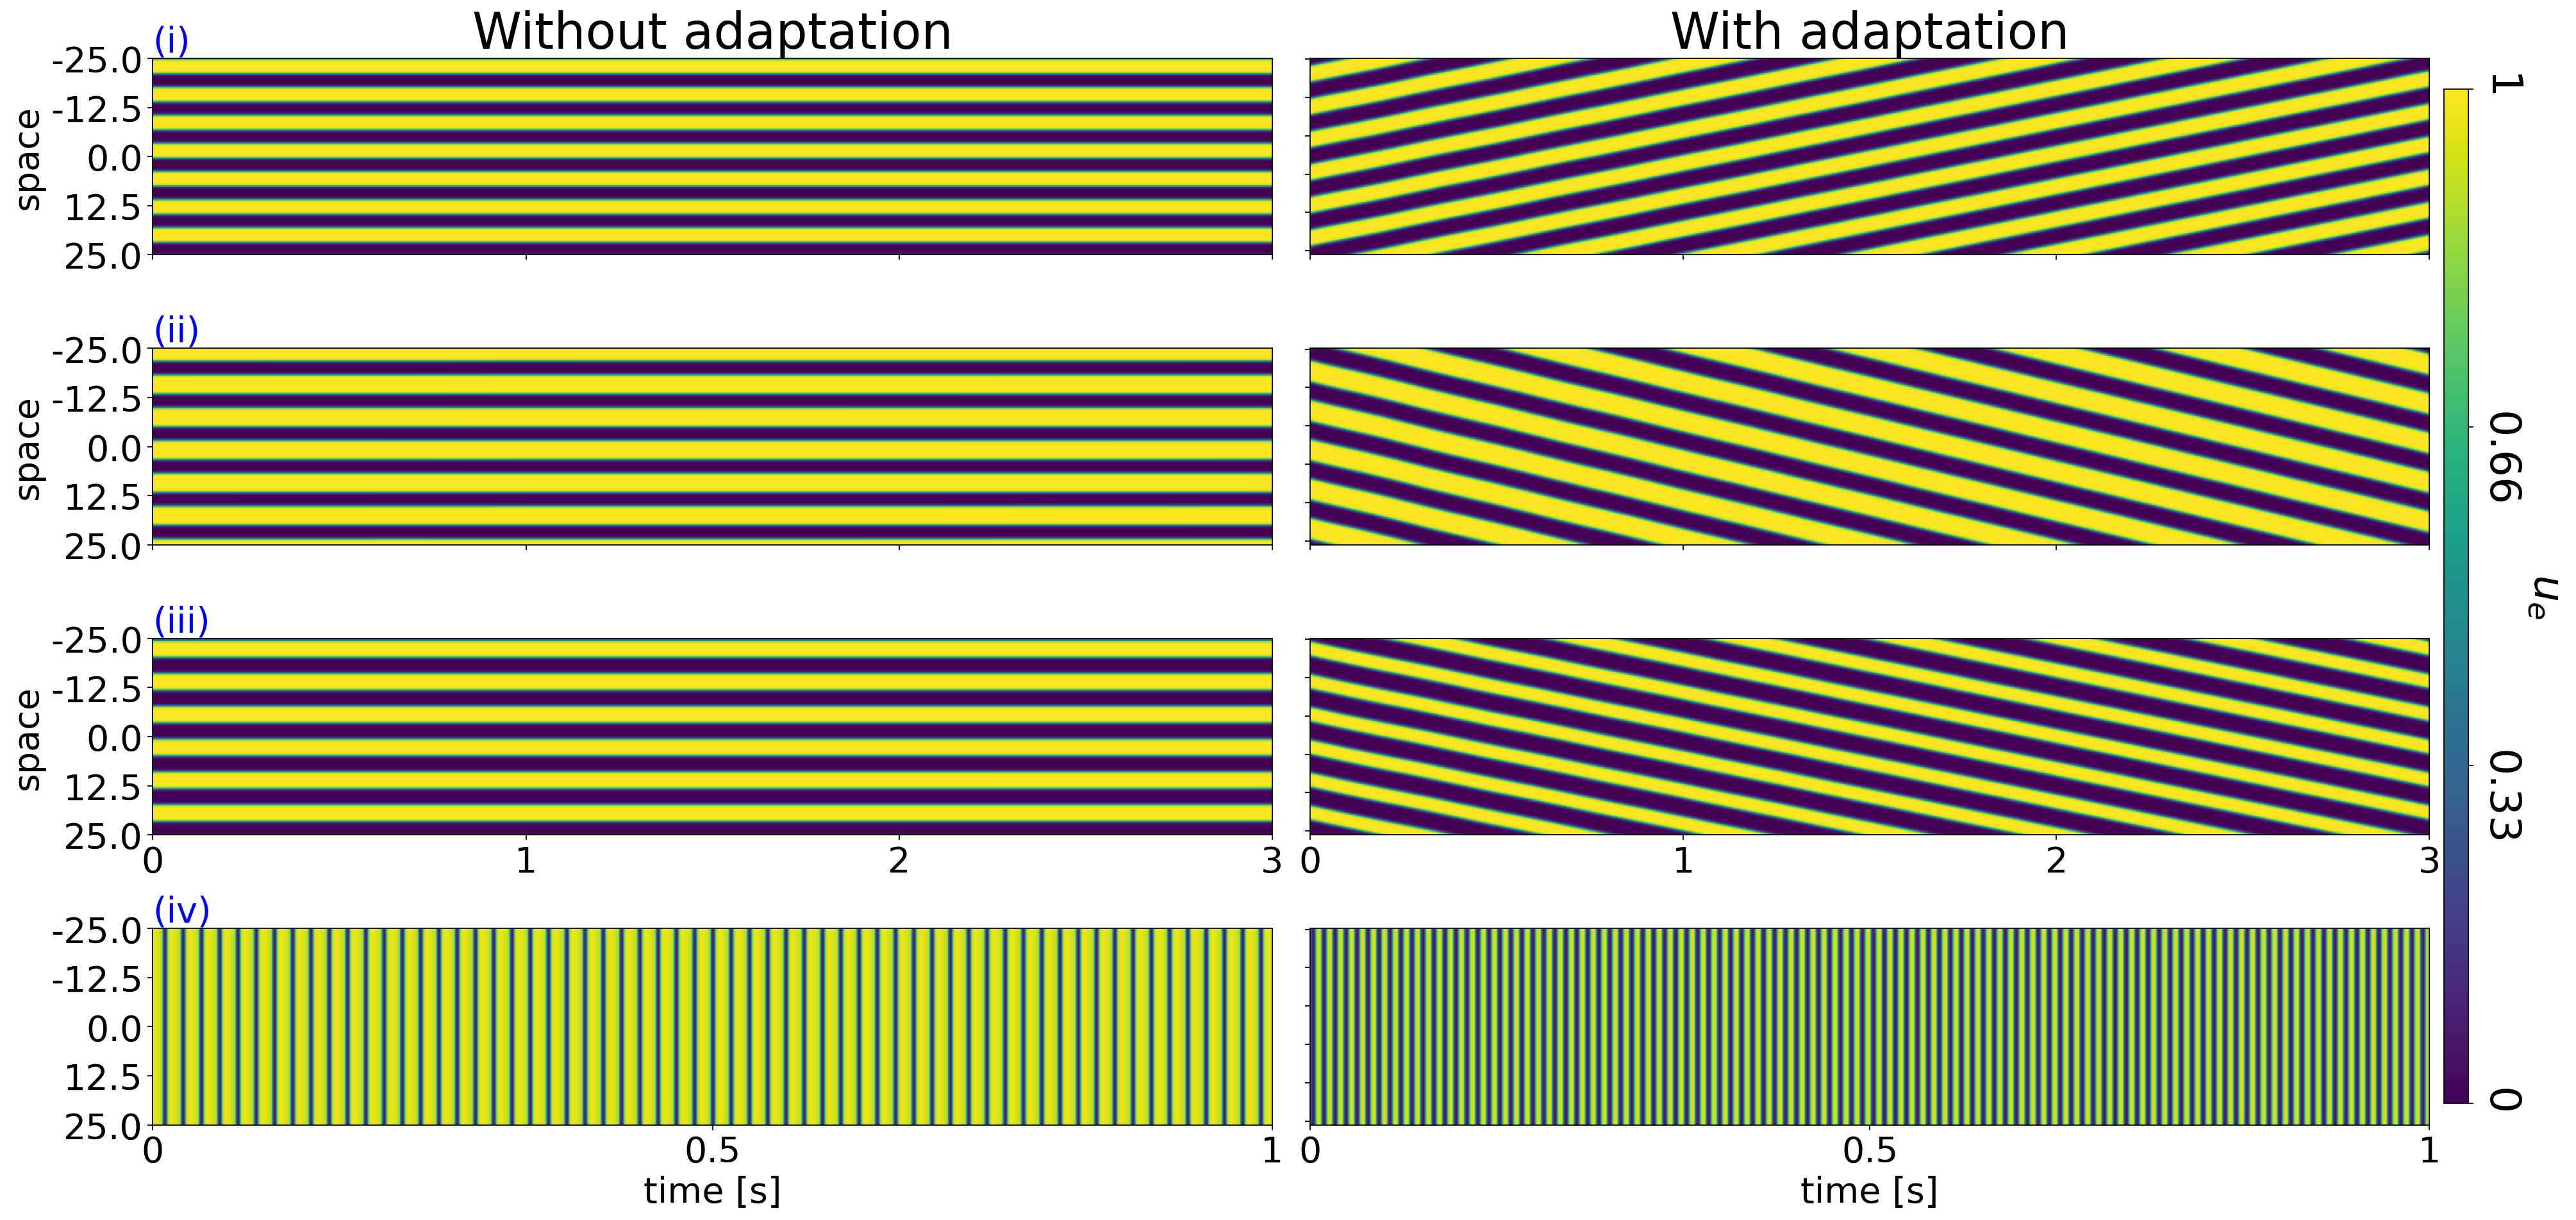

In [61]:
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5), (ax6, ax7)) = plt.subplots(4, 2, figsize = (24,12), dpi = 160)

ax0.set_title('Without adaptation', fontsize=35)
ax1.set_title('With adaptation', fontsize=35)

duration_bumps = 3 * 1000 * 10
duration_osc = 1 * 1000 * 10

ax0.imshow(case_i.T[:,int(-duration_bumps):], vmin=0, vmax=1, aspect='auto')
ax1.imshow(case_i_adaps.T[:,int(-duration_bumps):], vmin=0, vmax=1, aspect='auto')

ax2.imshow(case_ii.T[:,int(-duration_bumps):], vmin=0, vmax=1, aspect='auto')
pos = ax3.imshow(case_ii_adaps.T[:,int(-duration_bumps):], vmin=0, vmax=1, aspect='auto')

ax4.imshow(case_iii.T[:,int(-duration_bumps):], vmin=0, vmax=1, aspect='auto')
ax5.imshow(case_iii_adaps.T[:,int(-duration_bumps):], vmin=0, vmax=1, aspect='auto')

ax6.imshow(case_iv.T[:,int(-duration_osc):], vmin=0, vmax=1, aspect='auto')
ax7.imshow(case_iv_adaps.T[:,int(-duration_osc):], vmin=0, vmax=1, aspect='auto')

ax0.set_ylabel('space', fontsize=25)
ax2.set_ylabel('space', fontsize=25)
ax4.set_ylabel('space', fontsize=25)

ax6.set_xlabel('time [s]', fontsize=25)
ax7.set_xlabel('time [s]', fontsize=25)


ax0.text(1, -5, '(i)', fontsize=25, color='blue')
ax2.text(1, -5, '(ii)', fontsize=25, color='blue')
ax4.text(1, -5, '(iii)', fontsize=25, color='blue')
ax6.text(1, -5, '(iv)', fontsize=25, color='blue')

for ax in [ax0, ax1, ax2, ax3]:
    ax.xaxis.set_major_locator(ticker.LinearLocator(4))
    ax.set_xticklabels(labels=[])

for ax in [ax4, ax5]:
    ax.xaxis.set_major_locator(ticker.LinearLocator(4))
    ax.set_xticklabels(labels=time_bumps, fontsize=25)
    
    
for ax in [ax6, ax7]:
    ax.xaxis.set_major_locator(ticker.LinearLocator(3))
    ax.set_xticklabels(labels=time_osc, fontsize=25)


ax0.yaxis.set_major_locator(ticker.LinearLocator(5))
ax0.set_yticklabels(labels=space, fontsize=25)
ax2.yaxis.set_major_locator(ticker.LinearLocator(5))
ax2.set_yticklabels(labels=space, fontsize=25)
ax4.yaxis.set_major_locator(ticker.LinearLocator(5))
ax4.set_yticklabels(labels=space, fontsize=25)
ax6.yaxis.set_major_locator(ticker.LinearLocator(5))
ax6.set_yticklabels(labels=space, fontsize=25)

ax1.set_yticklabels(labels=[])
ax3.set_yticklabels(labels=[])
ax5.set_yticklabels(labels=[])
ax7.set_yticklabels(labels=[])

mini = 0
maxi = 1
cbar_ticks=np.linspace(mini,maxi,4)
cbar_labels=[0, 0.33, 0.66, 1]


plt.tight_layout()

if colorbar:
    # Create colorbar
    cb_ax = fig.add_axes([.995,.099,.01,.824])#([.99,.120,.04,.754])
    cbar = ax1.figure.colorbar(pos, ax=ax3, ticks=cbar_ticks, cax=cb_ax)
    cbar.ax.set_ylabel(r'$u_e$', rotation=-90, va="bottom", fontsize=30)
    cbar.ax.set_yticklabels(cbar_labels, rotation=-90, fontsize=30)
    cbar.minorticks_off()

plt.tight_layout()

#fig.savefig('activities.png')

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1653/2465055121.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=time_bumps, fontsize=25)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1653/2465055121.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(labels=space, fontsize=25)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1653/2465055121.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels=space, fontsize=25)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1653/2465055121.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


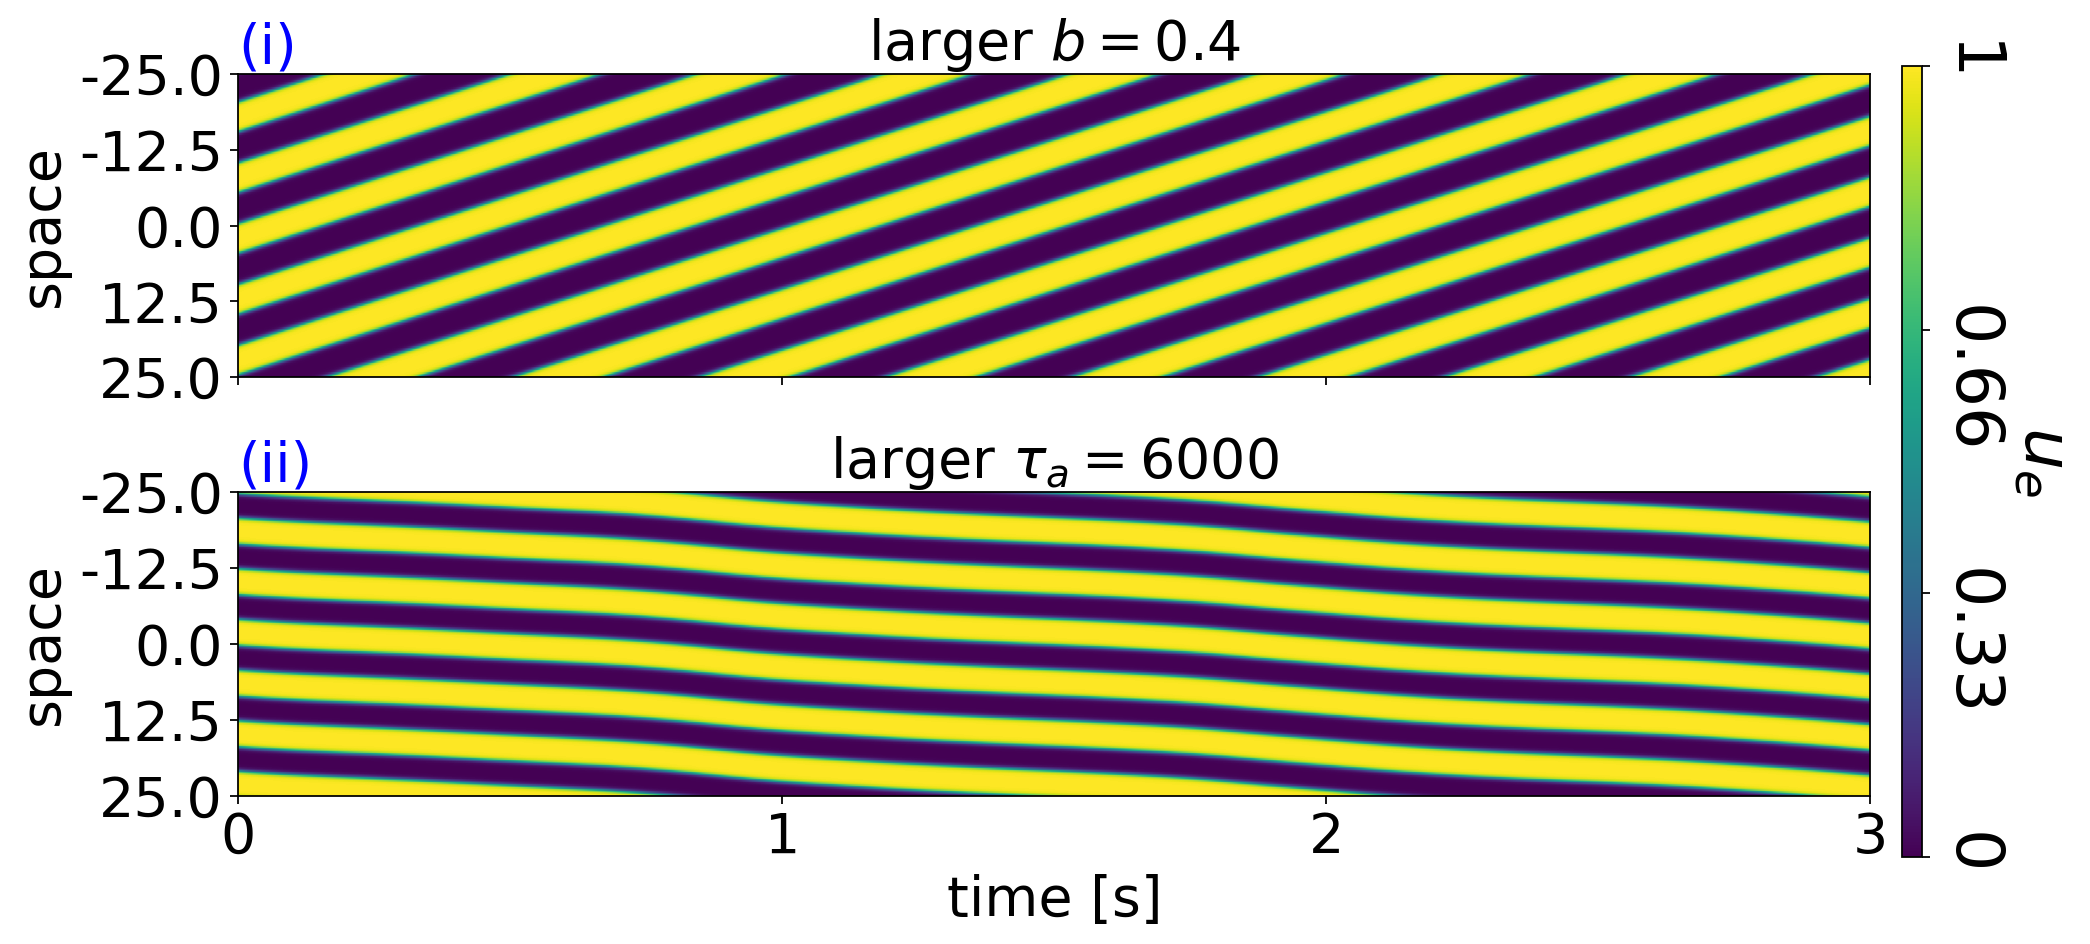

In [84]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize = (12,6), dpi = 160)

ax0.set_title('larger ' + r'$b=0.4$', fontsize=25)
ax1.set_title('larger ' + r'$\tau_a=6000$', fontsize=25)

duration_bumps = 3 * 1000 * 10
duration_osc = 1 * 1000 * 10

ax0.imshow(case_i_larger_b.T[:,int(-duration_bumps):], vmin=0, vmax=1, aspect='auto')
ax1.imshow(case_ii_larger_tau.T[:,int(-duration_bumps):], vmin=0, vmax=1, aspect='auto')

ax0.set_ylabel('space', fontsize=25)
ax1.set_ylabel('space', fontsize=25)

ax1.set_xlabel('time [s]', fontsize=25)

ax0.text(1, -5, '(i)', fontsize=25, color='blue')
ax1.text(1, -5, '(ii)', fontsize=25, color='blue')

ax0.xaxis.set_major_locator(ticker.LinearLocator(4))
ax0.set_xticklabels(labels=[])

ax1.xaxis.set_major_locator(ticker.LinearLocator(4))
ax1.set_xticklabels(labels=time_bumps, fontsize=25)

ax0.yaxis.set_major_locator(ticker.LinearLocator(5))
ax0.set_yticklabels(labels=space, fontsize=25)
ax1.yaxis.set_major_locator(ticker.LinearLocator(5))
ax1.set_yticklabels(labels=space, fontsize=25)

mini = 0
maxi = 1
cbar_ticks=np.linspace(mini,maxi,4)
cbar_labels=[0, 0.33, 0.66, 1]


plt.tight_layout()

if colorbar:
    # Create colorbar
    cb_ax = fig.add_axes([.995,.099,.01,.824])#([.99,.120,.04,.754])
    cbar = ax1.figure.colorbar(pos, ax=ax3, ticks=cbar_ticks, cax=cb_ax)
    cbar.ax.set_ylabel(r'$u_e$', rotation=-90, va="bottom", fontsize=30)
    cbar.ax.set_yticklabels(cbar_labels, rotation=-90, fontsize=30)
    cbar.minorticks_off()

plt.tight_layout()

#fig.savefig('activities.png')

In [85]:
ls0 = pd.read_csv('csv/i_b_df.csv')
ls1 = pd.read_csv('csv/ii_b_df.csv')
ls2 = pd.read_csv('csv/iii_b_df.csv')
ls3 = pd.read_csv('phase_lats/case_iv_b.csv')

ls4 = pd.read_csv('csv/i_tau_a_df.csv')
ls5 = pd.read_csv('csv/ii_tau_a_df.csv')
ls6 = pd.read_csv('csv/iii_tau_a_df.csv')
ls7 = pd.read_csv('phase_lats/case_iv_tau.csv')

In [254]:
df_case_i = pd.read_csv('csv/adaps_features_case_i.csv')#pd.read_csv('csv/adaps_features_rnd.csv')
df_case_ii = pd.read_csv('csv/adaps_features_case_ii.csv')
df_case_iii = pd.read_csv('csv/adaps_features_case_iii.csv')
df_case_iv = 

In [255]:
ls0 = df_case_i[np.isclose(df_case_i['tau_a'], 600)]
ls1 = df_case_ii[np.isclose(df_case_ii['tau_a'], 600)]
ls2 = df_case_iii[np.isclose(df_case_iii['tau_a'], 600)]

In [256]:
ls3 = df_case_i[np.isclose(df_case_i['b'], 0.25)]
ls4 = df_case_ii[np.isclose(df_case_ii['b'], 0.25)]
ls5 = df_case_iii[np.isclose(df_case_iii['b'], 0.25)]

In [86]:
#ls1['dom_frequ'][43] = 0
ls4

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,tau_a,dom_frequ,down_duration,down_duration_ratio,up_duration,up_duration_ratio
0,0,0,0,10.0,11.90,0.047565,0.566020,0.036469,0.433980
1,1,1,1,300.0,3.25,0.161600,0.525200,0.146092,0.474800
2,2,2,2,600.0,2.30,0.228800,0.526240,0.205983,0.473760
3,3,3,3,900.0,1.90,0.278876,0.529865,0.247439,0.470135
4,4,4,4,1200.0,1.65,0.315748,0.520985,0.290312,0.479015
5,5,5,5,1500.0,1.45,0.361286,0.523865,0.328369,0.476135
6,6,6,6,1800.0,1.35,0.385441,0.520345,0.355300,0.479655
7,7,7,7,2100.0,1.25,0.419488,0.524360,0.380512,0.475640
8,8,8,8,2400.0,1.15,0.459465,0.528385,0.410100,0.471615
9,9,9,9,2700.0,1.10,0.474209,0.521630,0.434882,0.478370


In [87]:
dfList1 = [ls0, ls1, ls2, ls3]
dfList2 = [ls4, ls5, ls6, ls7]

In [88]:
tau_labels = [10, 1500, 3000, 4500, 6000]

In [104]:
b_labels = [0, 0.25, 0.5]
b_high_frequ_labels = [40, 110]
b_low_frequ_labels = [0, 3, 6]
tau_high_frequ_labels = [100, 105]

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1653/292894566.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(labels=b_high_frequ_labels, fontsize=25)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1653/292894566.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels=tau_high_frequ_labels, fontsize=25)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1653/292894566.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(labels=b_low_frequ_labels, fontsize=25)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1653/292894566.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_yticklabels(labels=b_low_frequ_labels, fontsize=25)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1653/292894566.py:53: UserWarning: FixedFormatter should only be 

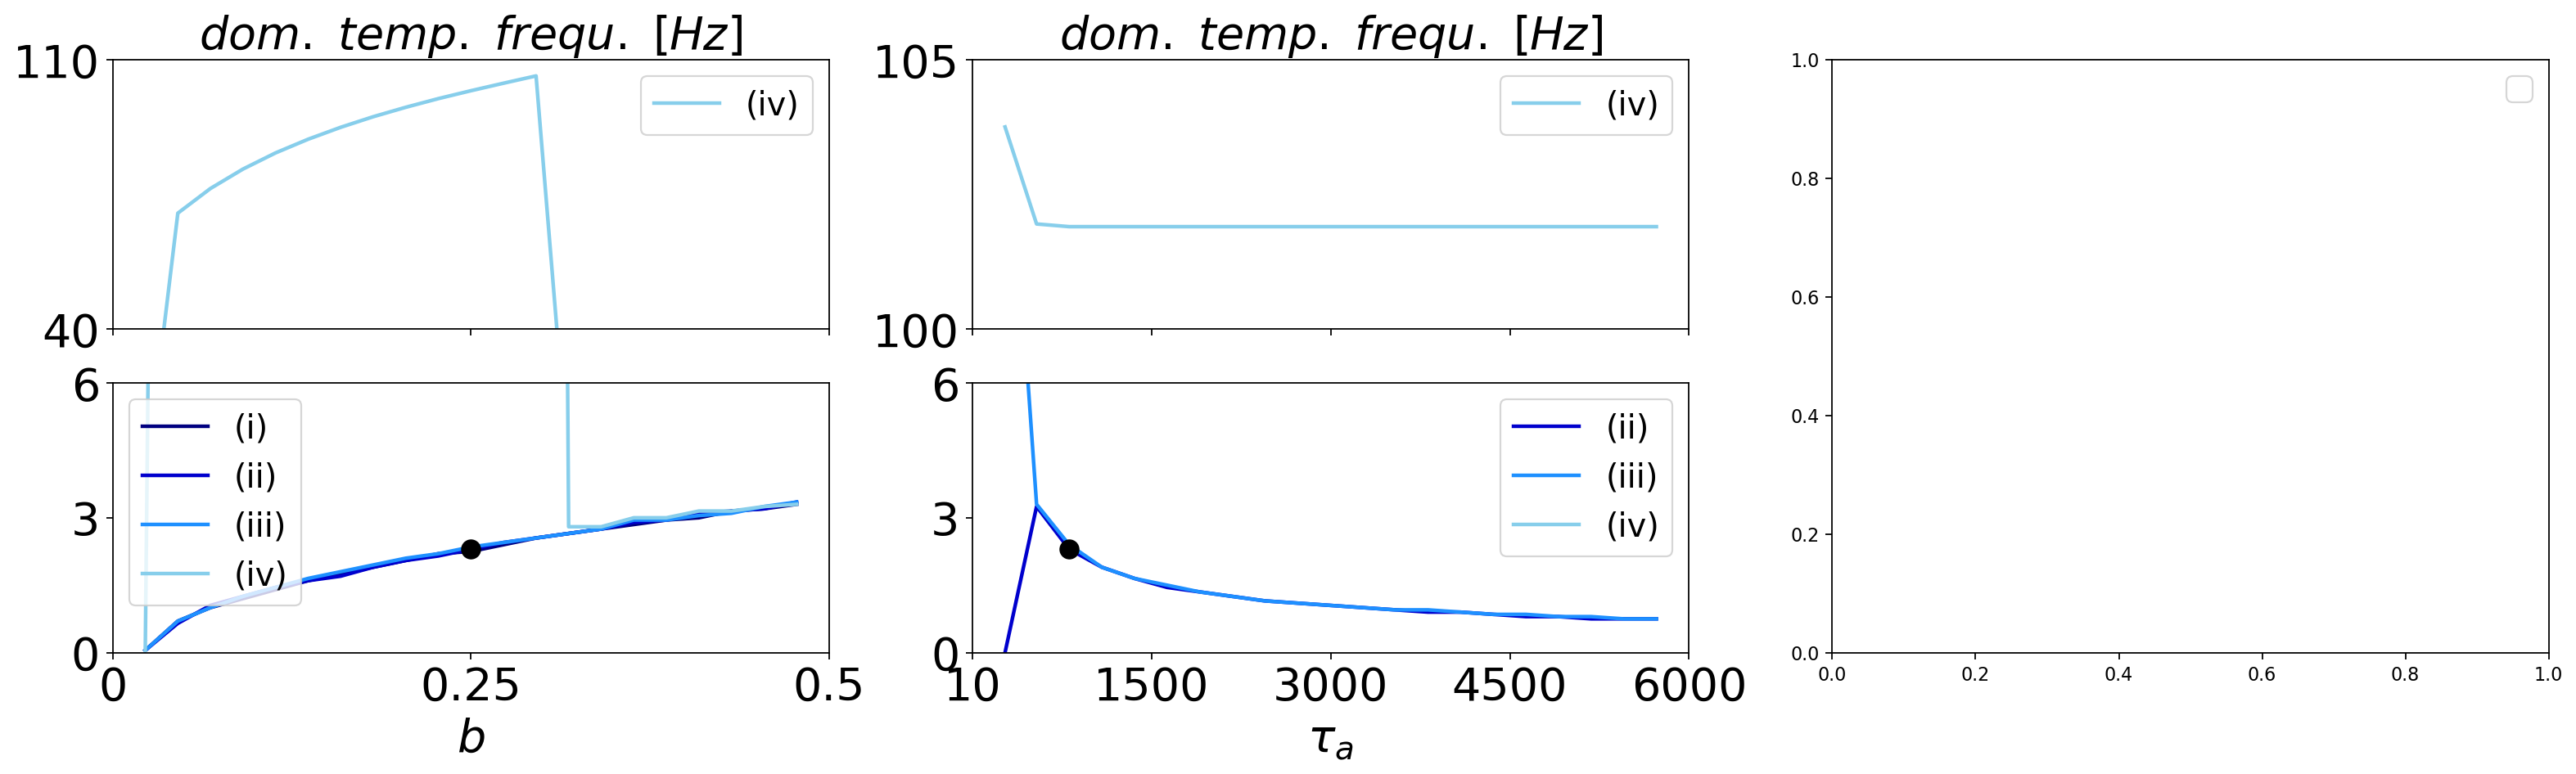

In [108]:
labels = ['(i)', '(ii)', '(iii)', '(iv)']#, '(iv)']
colors = ['navy', 'mediumblue', 'dodgerblue', 'skyblue'] #cm.get_cmap('winter', 4)

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(2, 3, figsize=(24,6), dpi=160)

ax5 = plt.subplot2grid((2, 3), (0, 2), rowspan=2)

ax0.set_title(r'$dom.$' + ' ' + r'$temp.$' + ' ' + r'$frequ.$' + ' ' + r'$[Hz]$', fontsize=25)#r'$Effect$' + ' ' + r'$of$' + ' ' + r'$b$', fontsize=25)
ax1.set_title(r'$dom.$' + ' ' + r'$temp.$' + ' ' + r'$frequ.$' + ' ' + r'$[Hz]$', fontsize=25)#r'$Effect$' + ' ' + r'$of$' + ' ' + r'$\tau_a$', fontsize=25)

dfList1[-1].plot(ax=ax0, x='b',  y='dom_frequ', c=colors[-1],
                label='%s' %labels[-1], fontsize=25, linewidth = lw)

dfList2[-1].plot(ax=ax1, x='tau_a',  y='dom_frequ', c=colors[-1],
                label='%s' %labels[-1], fontsize=25, linewidth = lw)

for idx, b_df in enumerate(dfList1):
    b_df.plot(ax=ax3, x='b',  y='dom_frequ', c=colors[idx],
              label='%s' %labels[idx], fontsize=25, linewidth = lw)

for idx, tau_df in enumerate(dfList2[1:]):
    idx+=1
    tau_df.plot(ax=ax4, x='tau_a',  y='dom_frequ', c=colors[idx],
              label='%s' %labels[idx], fontsize=25, linewidth = lw)
    

#ax0.text(-0.13, -2.8, r'$dom.$' + ' ' + r'$temp.$' + ' ' + r'$frequ.$' + ' ' + r'$[Hz]$', fontsize=25, rotation=90)
#set_ylabel(r'$dom.$' + ' ' + r'$temp.$' + ' ' + r'$frequ.$' + ' ' + r'$[Hz]$', fontsize=25)

ax0.set_ylim([40,110])
ax1.set_ylim([100,105])

ax3.set_ylim([0,6])
ax4.set_ylim([0,6])

#set high-frequ labels for b (yaxis)
ax0.yaxis.set_major_locator(ticker.LinearLocator(2))
ax0.set_yticklabels(labels=b_high_frequ_labels, fontsize=25)

#set high-frequ labels for tau_a (yaxis)
ax1.yaxis.set_major_locator(ticker.LinearLocator(2))
ax1.set_yticklabels(labels=tau_high_frequ_labels, fontsize=25)

#set low-frequ labels for b and omit for tau_a (yaxis)
ax3.yaxis.set_major_locator(ticker.LinearLocator(3))
ax3.set_yticklabels(labels=b_low_frequ_labels, fontsize=25)
ax4.yaxis.set_major_locator(ticker.LinearLocator(3))
ax4.set_yticklabels(labels=b_low_frequ_labels, fontsize=25)

#set b-axis labels
ax3.set_xlabel(r'$b$', fontsize=25)
ax3.xaxis.set_major_locator(ticker.LinearLocator(3))
ax3.set_xticklabels(labels=b_labels, fontsize=25)

#set tau_a-axis labels
ax4.set_xlabel(r'$\tau_a$', fontsize=25)
ax4.xaxis.set_major_locator(ticker.LinearLocator(5))
ax4.set_xticklabels(labels=tau_labels, fontsize=25)

#get rid of xaxis labels for upper plots and right
ax0.set_xticklabels(labels=[])
ax1.set_xticklabels(labels=[])


ax0.xaxis.set_major_locator(ticker.LinearLocator(3))
ax0.set_xlabel('')
ax1.xaxis.set_major_locator(ticker.LinearLocator(5))
ax1.set_xlabel('')

#ax5.set_xticklabels(labels=[])
#ax5.set_yticklabels(labels=[])

ax3.scatter(0.25, 2.3, s=100, c='black', zorder=2)
ax4.scatter(600, 2.3, s=100, c='black', zorder=2)

for ax in [ax0, ax1, ax2, ax3, ax4, ax5]:
    ax.legend(fontsize=18)



plt.show()

fig.savefig('features.png')

In [111]:
np.linspace(0,6000,21)

array([   0.,  300.,  600.,  900., 1200., 1500., 1800., 2100., 2400.,
       2700., 3000., 3300., 3600., 3900., 4200., 4500., 4800., 5100.,
       5400., 5700., 6000.])

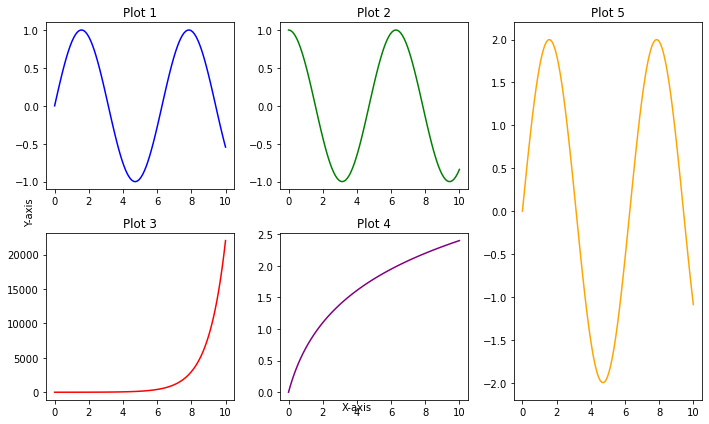

In [178]:
# Create data for the plots
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.exp(x)
y4 = np.log(x + 1)
y5 = 2 * np.sin(x)

# Create a 2x2 grid for the first four plots
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# Plot the first four plots
axes[0, 0].plot(x, y1, color='blue')
axes[0, 0].set_title('Plot 1')

axes[0, 1].plot(x, y2, color='green')
axes[0, 1].set_title('Plot 2')

axes[1, 0].plot(x, y3, color='red')
axes[1, 0].set_title('Plot 3')

axes[1, 1].plot(x, y4, color='purple')
axes[1, 1].set_title('Plot 4')

# Create a third column that spans over two rows for the fifth plot
ax5 = plt.subplot2grid((2, 3), (0, 2), rowspan=2)
ax5.plot(x, y5, color='orange')
ax5.set_title('Plot 5')

# Add a common x-axis label
fig.text(0.5, 0.04, 'X-axis', ha='center')
# Add a common y-axis label
fig.text(0.04, 0.5, 'Y-axis', va='center', rotation='vertical')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1724/605242293.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=tau_labels, fontsize=25)


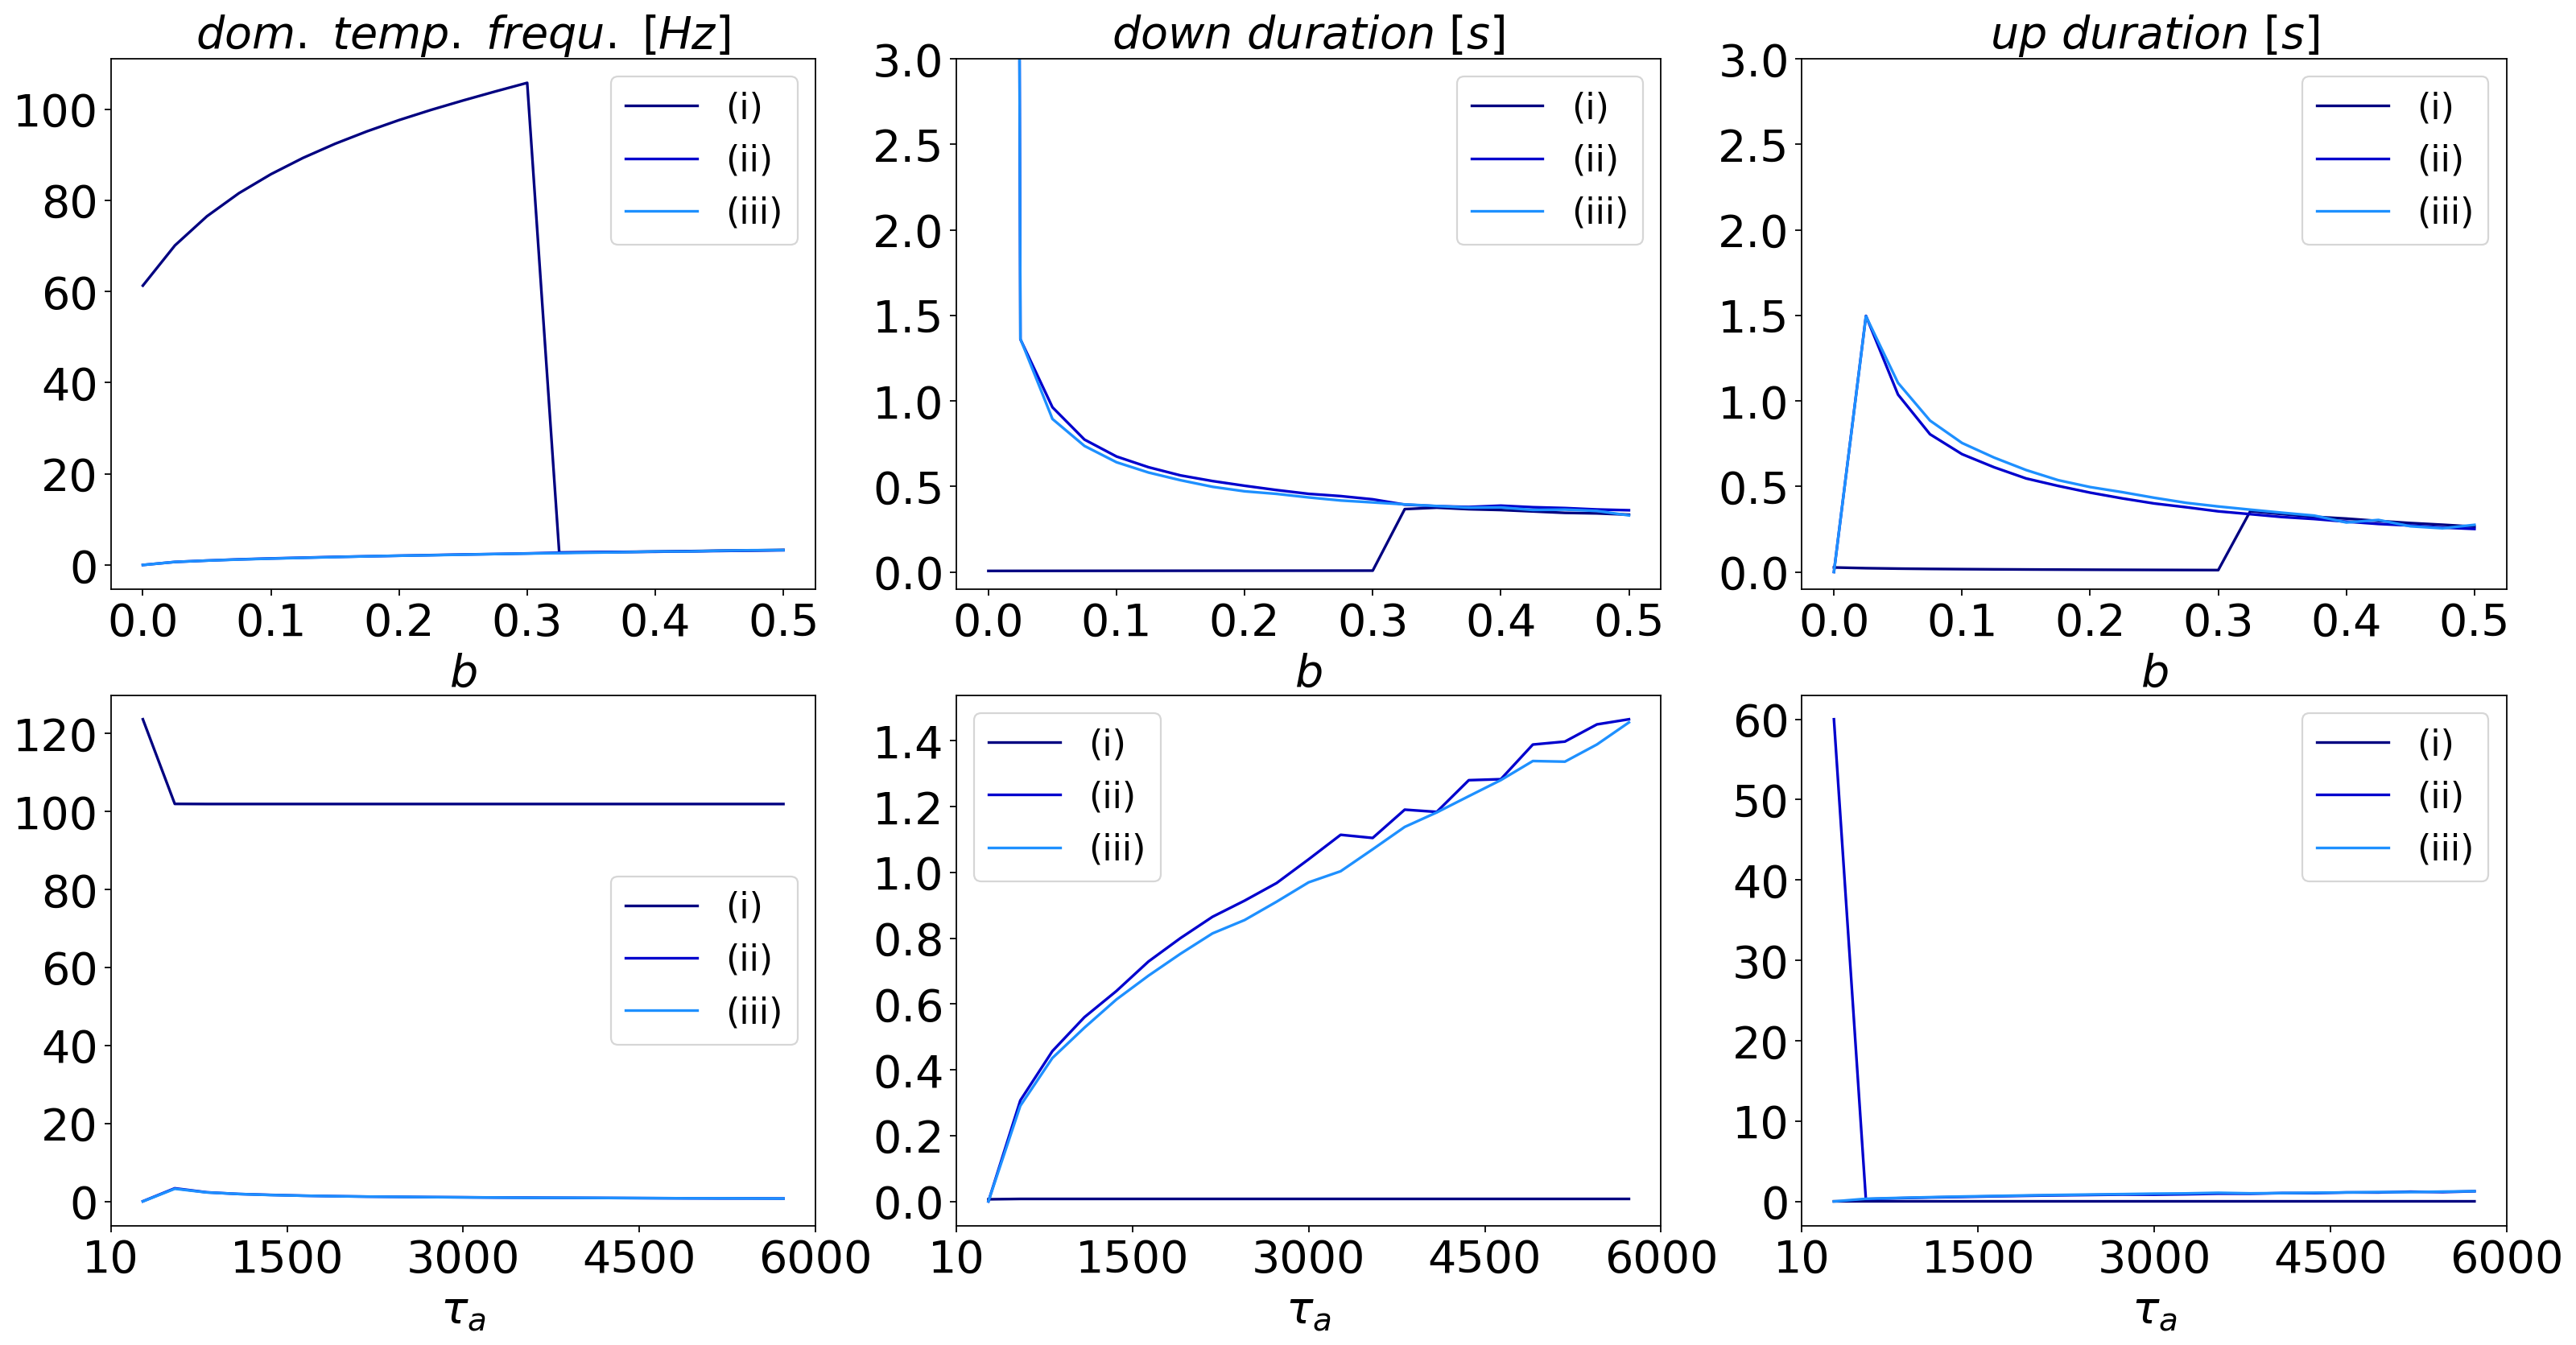

In [166]:
labels = ['(i)', '(ii)', '(iii)']#, '(iv)']
colors = ['navy', 'mediumblue', 'dodgerblue']#, 'skyblue'] #cm.get_cmap('winter', 4)

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(2, 3, figsize=(24,12), dpi=160)

ax0.set_title(r'$dom.$' + ' ' + r'$temp.$' + ' ' + r'$frequ.$' + ' ' + r'$[Hz]$', fontsize=25)
ax1.set_title(r'$down$' + ' ' + r'$duration$' + ' ' + r'$[s]$', fontsize=25)
ax2.set_title(r'$up$' + ' ' + r'$duration$' + ' ' + r'$[s]$', fontsize=25)

for idx, b_df in enumerate(dfList1):
    b_df.plot(ax=ax0, x='b',  y='dom_frequ', c=colors[idx],
              label='%s' %labels[idx], fontsize=25)
    
    b_df.plot(ax=ax1, x='b',  y='down_duration', c=colors[idx],
              label='%s' %labels[idx], fontsize=25)
    
    b_df.plot(ax=ax2, x='b',  y='up_duration', c=colors[idx],
              label='%s' %labels[idx], fontsize=25)

#ax0.text(-0.15, -2, r'$dom.$' + ' ' + r'$temp.$' + ' ' + r'$frequ.$' + ' ' + r'$[Hz]$', fontsize=25, rotation=90)
#ax1.text(-0.15, -1.8, r'$down$' + ' ' + r'$duration$' + ' ' + r'$[s]$', fontsize=25, rotation=90)
#ax2.set_ylabel(r'$up$' + ' ' + r'$duration$' + ' ' + r'$[s]$', fontsize=25)

for ax in [ax0, ax1, ax2]:
    ax.set_xlabel(r'$b$', fontsize=25)

ax1.set_ylim([-0.1,3])
ax2.set_ylim([-0.1,3])


for idx, tau_df in enumerate(dfList2):
    tau_df.plot(ax=ax3, x='tau_a', y='dom_frequ', c=colors[idx],
                label='%s' %labels[idx], fontsize=25)
    
    tau_df.plot(ax=ax4, x='tau_a', y='down_duration', c=colors[idx],
                label='%s' %labels[idx], fontsize=25)
    
    tau_df.plot(ax=ax5, x='tau_a', y='up_duration', c=colors[idx],
                label='%s' %labels[idx], fontsize=25)
    

#ax3.set_ylabel(r'$dom.$' + ' ' + r'$temp.$' + ' ' + r'$frequ.$' + ' ' + r'$[Hz]$', fontsize=25)
#ax4.set_ylabel(r'$down$' + ' ' + r'$duration$' + ' ' + r'$[s]$', fontsize=25)
#ax5.set_ylabel(r'$up$' + ' ' + r'$duration$' + ' ' + r'$[s]$', fontsize=25)

for ax in [ax3, ax4, ax5]:
    ax.set_xlabel(r'$\tau_a$', fontsize=25)
    ax.xaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_xticklabels(labels=tau_labels, fontsize=25)

for ax in [ax0, ax1, ax2, ax3, ax4, ax5]:
    ax.legend(fontsize=20)

    
plt.show()

fig.savefig('features.png')